#  Bike Sharing System and Linear Regression

## Problem Statement 

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider __BoomBikes__ has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. 

The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a __mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state__. 

#### Business Goal:

You are required to model the demand for shared bikes with the available __independent variables__. It will be used by the management to understand how exactly the demands vary with different features.

They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

Dataset
- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Data Reading using read_csv method
bike_df = pd.read_csv('day.csv')
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Data Understanding

In [4]:
#Type of columns
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bike_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

As per the given statement the __cnt__ is the defendent variable. __'instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday','workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed'__ are the independent variables

In [6]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# findin nulls in the dataframe
bike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

__From above statement we can conclude that given dataframe has no null value.__ No need to clean any thing in the Dataframe.

In [8]:
bike_df.shape

(730, 16)

## Data Preparation

Converting __dteday__ column object to datetime using __pd.to_datetime() function__

In [9]:
#Converting object to Datetime format
bike_df['dteday'] = pd.to_datetime(bike_df['dteday'])

In [10]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In Dataframe __instant__ variable is not contributing anything so we can drop this column

In [11]:
bike_df = bike_df.drop('instant',axis =1)
bike_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2018-02-01,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2018-03-01,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2018-04-01,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2018-05-01,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


__dteday__ all featues are seperated and present in the DataFrame so we can remvoe that

In [12]:
bike_df = bike_df.drop('dteday',axis=1)
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


__casual and Registered__ columns are added up and shown in __cnt__. cnt is target variable. so we can drop them

In [13]:
bike_df = bike_df.drop(['casual','registered'],axis =1)
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [14]:
# correation function to find correlation of temp and atemp
m = bike_df[['temp','atemp']].corr()
print(m)

           temp     atemp
temp   1.000000  0.991696
atemp  0.991696  1.000000


__temp and atemp__ are highly correlated to each other from the above statement, so we can drop multicolinear columns

In [15]:
bike_df = bike_df.drop('atemp',axis=1)
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


In [16]:
bike_df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [17]:
bike_df.yr.value_counts()

1    365
0    365
Name: yr, dtype: int64

In [18]:
bike_df.mnth.value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [19]:
bike_df.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [20]:
bike_df.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [21]:
bike_df.weekday.value_counts()

6    105
1    105
0    105
5    104
4    104
2    104
3    103
Name: weekday, dtype: int64

In [22]:
bike_df.workingday.value_counts()

1    499
0    231
Name: workingday, dtype: int64

From above statement we can say that __Season,yr,mnth,holiday,weekday,workingday,weathersit__ are categorical variables


In [23]:
season_map = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
bike_df['season'] = bike_df['season'].map(season_map)
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


In [24]:
bike_df['yr']= bike_df['yr'].map({0:2018,1:2019})
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,spring,2018,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,spring,2018,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,spring,2018,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,spring,2018,1,0,3,1,1,9.305237,43.6957,12.522300,1600


In [25]:
bike_df['mnth'] = bike_df['mnth'].map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',
                                      9:'sep',10:'oct',11:'nov',12:'dec'})
bike_df['holiday'] = bike_df['holiday'].map({1:'holiday',0:'not-holiday'})
bike_df['workingday'] = bike_df['workingday'].map({1:'Workingday',0:'Non-Working'})
bike_df['weekday'] = bike_df['weekday'].map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Ths',5:'Fri',6:'Sat'})
bike_df['weathersit'] = bike_df['weathersit'].map({1:'Clear',2:'Mist',3:'Light snow',4:'Heavy Rain'})
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,jan,not-holiday,Sat,Non-Working,Mist,14.110847,80.5833,10.749882,985
1,spring,2018,jan,not-holiday,Sun,Non-Working,Mist,14.902598,69.6087,16.652113,801
2,spring,2018,jan,not-holiday,Mon,Workingday,Clear,8.050924,43.7273,16.636703,1349
3,spring,2018,jan,not-holiday,Tue,Workingday,Clear,8.200000,59.0435,10.739832,1562
4,spring,2018,jan,not-holiday,Wed,Workingday,Clear,9.305237,43.6957,12.522300,1600


#  Data Visualization and Univariate Analysis for the Dataframe

In [26]:
def uni_box(x):
    sns.boxplot(x=x, y='cnt',data = bike_df)
    plt.show()

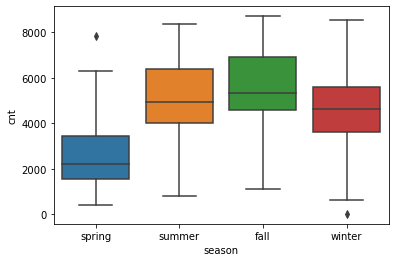

In [27]:
# Season Vs cnt
uni_box('season')

Clearly from visualization we can see that in __fall__ the bike rental is more than any other season, __spring__ has the minimum Bike sharing 

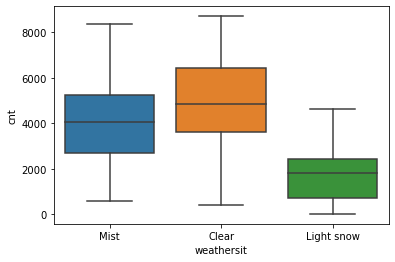

In [28]:
# weathersit vs cnt
uni_box('weathersit')

Clearly from figure we can say that when you have __Clear__ weather number of rentals is more 

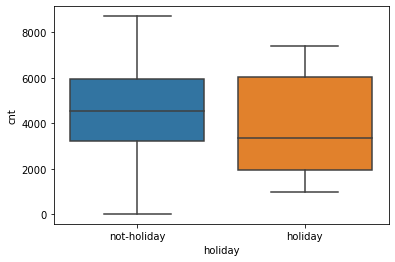

In [29]:
# holiday Vs cnt
uni_box('holiday')

Clearly from figure average of bike sharing is more in not-holiday

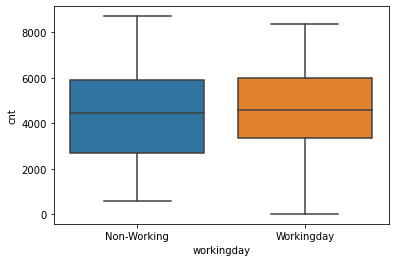

In [30]:
# Working day vs cnt
uni_box('workingday')

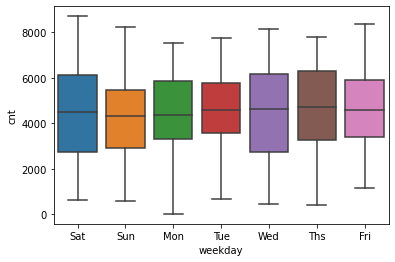

In [31]:
#Weekday vs cnt
uni_box('weekday')

 Clearly from figure the average of renting the bike is almost similar.

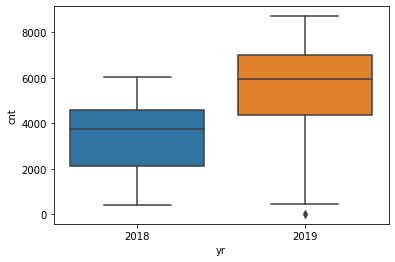

In [32]:
#year vs cnt
uni_box('yr')

## Checking for the correlation for numerical variables in DataFrame

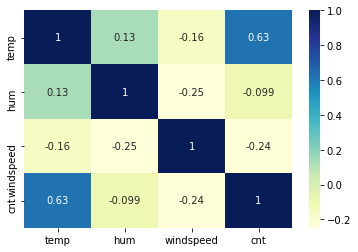

In [33]:
sns.heatmap(bike_df[['temp','hum','windspeed','cnt']].corr(),annot=True,cmap="YlGnBu")
plt.show()

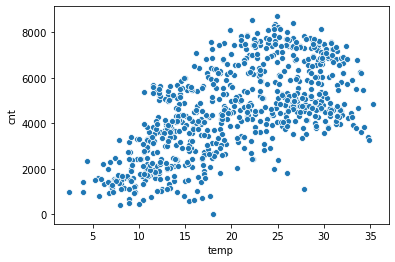

In [34]:
#Scatterplot for temp and cnt
sns.scatterplot(bike_df.temp,bike_df.cnt)
plt.show()

From the Scatterplot of temp and cnt we can say there as the temerature rises the number of sharing of bike also increased they are likely linear releated

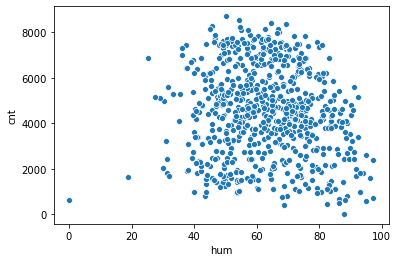

In [35]:
#Scatter plot for humidity and cnt
sns.scatterplot(bike_df.hum,bike_df.cnt)
plt.show()

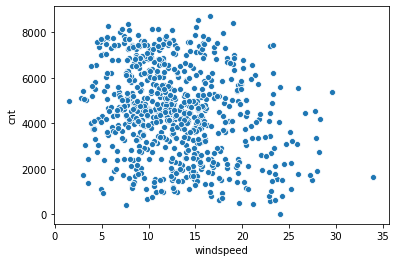

In [36]:
#Scatter plot for windspeed and cnt
sns.scatterplot(bike_df.windspeed,bike_df.cnt)
plt.show()

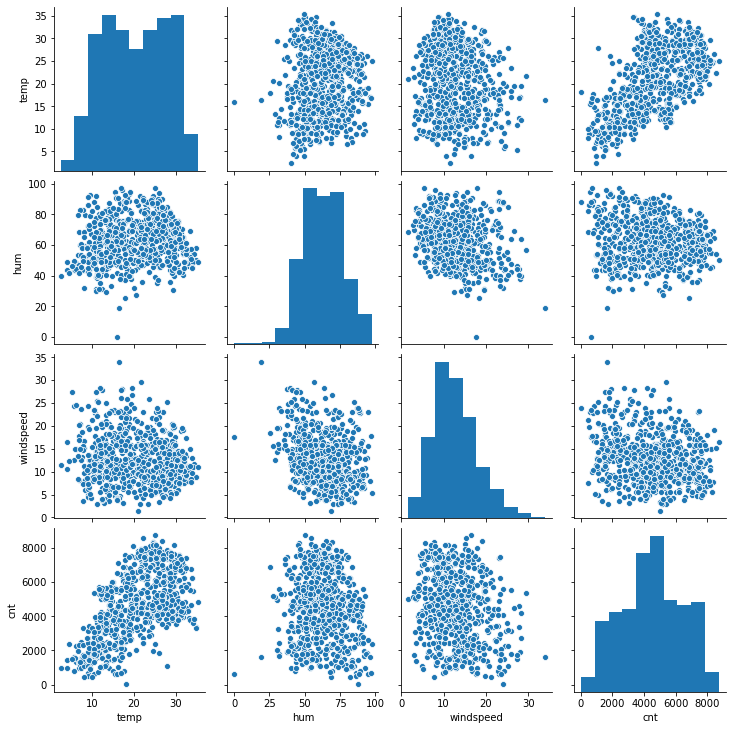

In [182]:
sns.pairplot(bike_df[['temp','hum','windspeed','cnt']])
plt.show()

In [37]:
#Storing the dataframe to master.csv
bike_df.to_csv('master.csv',index= False)

## Data Preparation for Modeling

In [38]:
# getting dummies for the categorical and Staandaredizing
master_df = pd.read_csv('master.csv')
master_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,jan,not-holiday,Sat,Non-Working,Mist,14.110847,80.5833,10.749882,985
1,spring,2018,jan,not-holiday,Sun,Non-Working,Mist,14.902598,69.6087,16.652113,801
2,spring,2018,jan,not-holiday,Mon,Workingday,Clear,8.050924,43.7273,16.636703,1349
3,spring,2018,jan,not-holiday,Tue,Workingday,Clear,8.200000,59.0435,10.739832,1562
4,spring,2018,jan,not-holiday,Wed,Workingday,Clear,9.305237,43.6957,12.522300,1600


In [39]:
# Create dummy variables for seasons and store it in seasons_dummy
season_dummy = pd.get_dummies(master_df['season'],drop_first= True)
season_dummy

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


In [40]:
#Adding the dummies to the master_df
master_df = pd.concat([master_df,season_dummy],axis =1)
master_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter
0,spring,2018,jan,not-holiday,Sat,Non-Working,Mist,14.110847,80.5833,10.749882,985,1,0,0
1,spring,2018,jan,not-holiday,Sun,Non-Working,Mist,14.902598,69.6087,16.652113,801,1,0,0
2,spring,2018,jan,not-holiday,Mon,Workingday,Clear,8.050924,43.7273,16.636703,1349,1,0,0
3,spring,2018,jan,not-holiday,Tue,Workingday,Clear,8.200000,59.0435,10.739832,1562,1,0,0
4,spring,2018,jan,not-holiday,Wed,Workingday,Clear,9.305237,43.6957,12.522300,1600,1,0,0


In [41]:
#Creating dummies for yr,mnth,holiday,weekday,workingday and weathersit 
yr_dummy= pd.get_dummies(master_df['yr'],drop_first= True)
mnth_dummy = pd.get_dummies(master_df['mnth'],drop_first= True)
holiday_dummy = pd.get_dummies(master_df['holiday'],drop_first= True)
weekday_dummy = pd.get_dummies(master_df['weekday'],drop_first= True)
workingday_dummy = pd.get_dummies(master_df['workingday'],drop_first= True)
weathersit_dummy = pd.get_dummies(master_df['weathersit'],drop_first= True)
print(yr_dummy.info())
print(mnth_dummy.info())
print(holiday_dummy.info())
print(weekday_dummy.info())
print(workingday_dummy.info())
print(weathersit_dummy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   2019    730 non-null    uint8
dtypes: uint8(1)
memory usage: 858.0 bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   aug     730 non-null    uint8
 1   dec     730 non-null    uint8
 2   feb     730 non-null    uint8
 3   jan     730 non-null    uint8
 4   jul     730 non-null    uint8
 5   jun     730 non-null    uint8
 6   mar     730 non-null    uint8
 7   may     730 non-null    uint8
 8   nov     730 non-null    uint8
 9   oct     730 non-null    uint8
 10  sep     730 non-null    uint8
dtypes: uint8(11)
memory usage: 8.0 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 1 columns):
 #   Column       Non-Null Count  D

In [42]:
master_df = pd.concat([master_df,yr_dummy],axis =1)
master_df = pd.concat([master_df,mnth_dummy],axis =1)
master_df = pd.concat([master_df,holiday_dummy],axis =1)
master_df = pd.concat([master_df,weekday_dummy],axis =1)
master_df = pd.concat([master_df,workingday_dummy],axis =1)
master_df = pd.concat([master_df,weathersit_dummy],axis =1)
master_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,not-holiday,Mon,Sat,Sun,Ths,Tue,Wed,Workingday,Light snow,Mist
0,spring,2018,jan,not-holiday,Sat,Non-Working,Mist,14.110847,80.5833,10.749882,...,1,0,1,0,0,0,0,0,0,1
1,spring,2018,jan,not-holiday,Sun,Non-Working,Mist,14.902598,69.6087,16.652113,...,1,0,0,1,0,0,0,0,0,1
2,spring,2018,jan,not-holiday,Mon,Workingday,Clear,8.050924,43.7273,16.636703,...,1,1,0,0,0,0,0,1,0,0
3,spring,2018,jan,not-holiday,Tue,Workingday,Clear,8.200000,59.0435,10.739832,...,1,0,0,0,0,1,0,1,0,0
4,spring,2018,jan,not-holiday,Wed,Workingday,Clear,9.305237,43.6957,12.522300,...,1,0,0,0,0,0,1,1,0,0


In [43]:
master_df.to_csv('raw_data.csv',index=False)

In [44]:
raw_df  = pd.read_csv('raw_data.csv')
raw_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,not-holiday,Mon,Sat,Sun,Ths,Tue,Wed,Workingday,Light snow,Mist
0,spring,2018,jan,not-holiday,Sat,Non-Working,Mist,14.110847,80.5833,10.749882,...,1,0,1,0,0,0,0,0,0,1
1,spring,2018,jan,not-holiday,Sun,Non-Working,Mist,14.902598,69.6087,16.652113,...,1,0,0,1,0,0,0,0,0,1
2,spring,2018,jan,not-holiday,Mon,Workingday,Clear,8.050924,43.7273,16.636703,...,1,1,0,0,0,0,0,1,0,0
3,spring,2018,jan,not-holiday,Tue,Workingday,Clear,8.200000,59.0435,10.739832,...,1,0,0,0,0,1,0,1,0,0
4,spring,2018,jan,not-holiday,Wed,Workingday,Clear,9.305237,43.6957,12.522300,...,1,0,0,0,0,0,1,1,0,0


Remove the categorical variables as their dummies are present in the dataframe

In [45]:
raw_df = raw_df.drop(['season','yr','mnth','holiday','weekday','workingday','weathersit'],axis=1)
raw_df.head()

,temp,hum,windspeed,cnt,spring,summer,winter,2019,aug,dec,...,not-holiday,Mon,Sat,Sun,Ths,Tue,Wed,Workingday,Light snow,Mist
0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
1,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
2,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,...,1,1,0,0,0,0,0,1,0,0
3,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
4,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0


In [46]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temp         730 non-null    float64
 1   hum          730 non-null    float64
 2   windspeed    730 non-null    float64
 3   cnt          730 non-null    int64  
 4   spring       730 non-null    int64  
 5   summer       730 non-null    int64  
 6   winter       730 non-null    int64  
 7   2019         730 non-null    int64  
 8   aug          730 non-null    int64  
 9   dec          730 non-null    int64  
 10  feb          730 non-null    int64  
 11  jan          730 non-null    int64  
 12  jul          730 non-null    int64  
 13  jun          730 non-null    int64  
 14  mar          730 non-null    int64  
 15  may          730 non-null    int64  
 16  nov          730 non-null    int64  
 17  oct          730 non-null    int64  
 18  sep          730 non-null    int64  
 19  not-holi

## Making standardizing the features

### Rescaling the Features 

As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that except for `temp`, all the columns have  float values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [48]:
num_vars = ['temp','hum','windspeed','cnt']
raw_df[num_vars] = scaler.fit_transform(raw_df[num_vars])
raw_df.head()

,temp,hum,windspeed,cnt,spring,summer,winter,2019,aug,dec,...,not-holiday,Mon,Sat,Sun,Ths,Tue,Wed,Workingday,Light snow,Mist
0,0.355170,0.828620,0.284606,0.110792,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
1,0.379232,0.715771,0.466215,0.089623,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
2,0.171000,0.449638,0.465740,0.152669,1,0,0,0,0,0,...,1,1,0,0,0,0,0,1,0,0
3,0.175530,0.607131,0.284297,0.177174,1,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
4,0.209120,0.449313,0.339143,0.181546,1,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0


In [49]:
raw_df.describe()

,temp,hum,windspeed,cnt,spring,summer,winter,2019,aug,dec,...,not-holiday,Mon,Sat,Sun,Ths,Tue,Wed,Workingday,Light snow,Mist
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.543852,0.645400,0.346568,0.516108,0.246575,0.252055,0.243836,0.500000,0.084932,0.084932,...,0.971233,0.143836,0.143836,0.143836,0.142466,0.142466,0.141096,0.683562,0.028767,0.336986
std,0.228140,0.146402,0.159873,0.222735,0.431313,0.434490,0.429689,0.500343,0.278971,0.278971,...,0.167266,0.351164,0.351164,0.351164,0.349767,0.349767,0.348359,0.465405,0.167266,0.473004
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.346084,0.534704,0.232045,0.362143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.548307,0.643959,0.326928,0.520766,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.743261,0.750535,0.434629,0.683847,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temp         730 non-null    float64
 1   hum          730 non-null    float64
 2   windspeed    730 non-null    float64
 3   cnt          730 non-null    float64
 4   spring       730 non-null    int64  
 5   summer       730 non-null    int64  
 6   winter       730 non-null    int64  
 7   2019         730 non-null    int64  
 8   aug          730 non-null    int64  
 9   dec          730 non-null    int64  
 10  feb          730 non-null    int64  
 11  jan          730 non-null    int64  
 12  jul          730 non-null    int64  
 13  jun          730 non-null    int64  
 14  mar          730 non-null    int64  
 15  may          730 non-null    int64  
 16  nov          730 non-null    int64  
 17  oct          730 non-null    int64  
 18  sep          730 non-null    int64  
 19  not-holi

## Checking the correation between all the variables by heat map

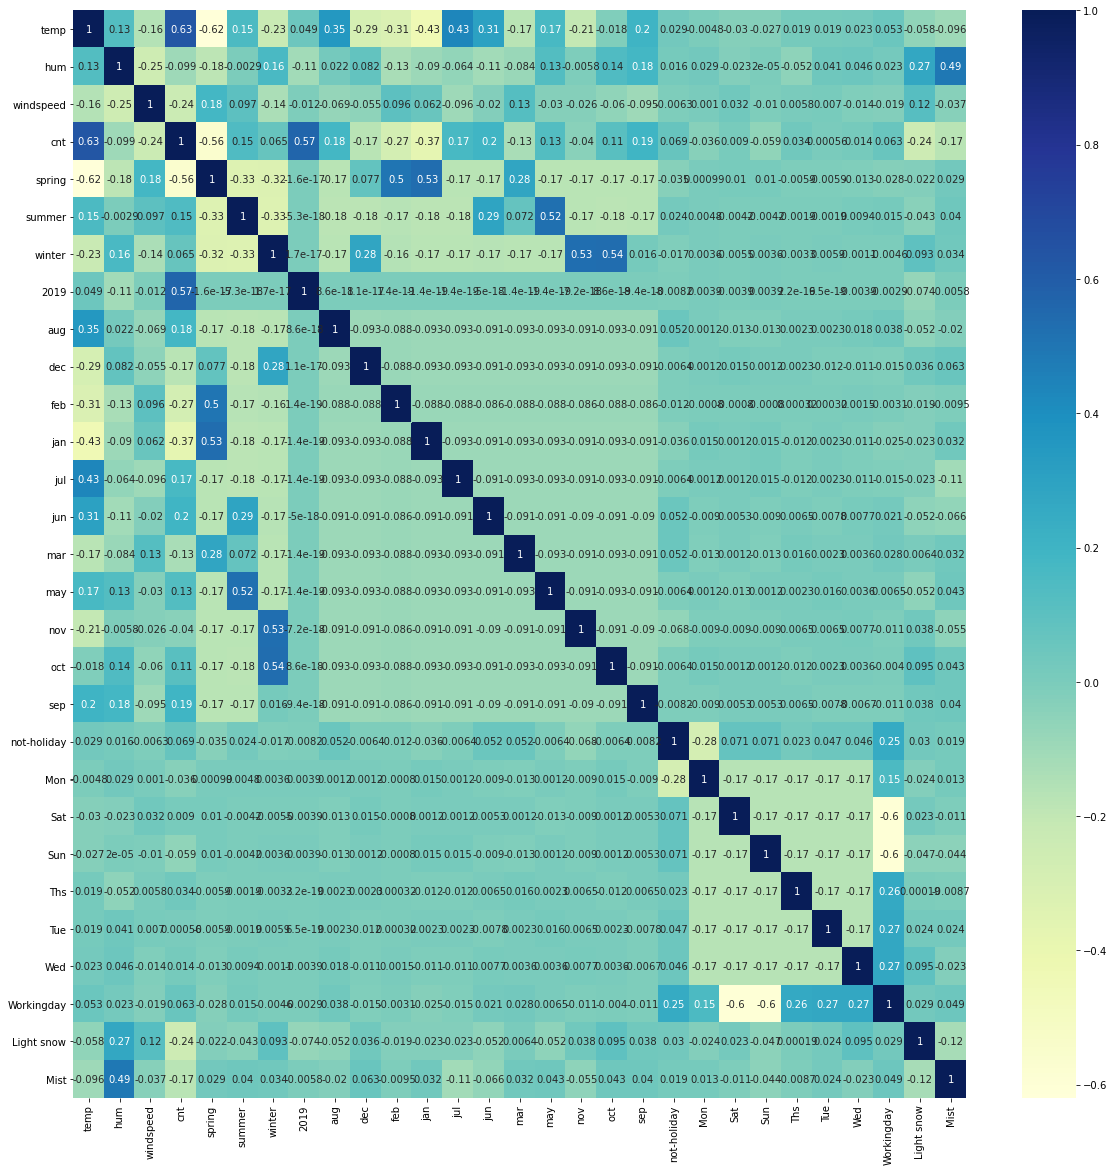

In [51]:
plt.figure(figsize=(20,20))
sns.heatmap(raw_df.corr(),annot=True,cmap="YlGnBu")
plt.show()

# Spliting the data frame to training and testing data

In [174]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(raw_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [175]:
print(df_train.shape,df_test.shape)

(510, 29) (219, 29)


##  Dividing into X and Y sets for the model building

In [176]:
y_train = df_train.pop('cnt')
X_train = df_train

In [108]:
X_train.head()

,temp,hum,windspeed,spring,summer,winter,2019,aug,dec,feb,...,not-holiday,Mon,Sat,Sun,Ths,Tue,Wed,Workingday,Light snow,Mist
653,0.509887,0.574121,0.329497,0,0,1,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0
576,0.815169,0.724079,0.294871,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0
426,0.442393,0.638817,0.285911,1,0,0,1,0,0,0,...,1,0,1,0,0,0,0,0,0,1
728,0.245101,0.497001,0.676936,1,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,0
482,0.395666,0.503427,0.221789,0,1,0,1,0,0,0,...,1,0,1,0,0,0,0,0,0,1


In [187]:
y_train_rs = y_train.values.reshape(-1,1)
y_train_rs.shape

(510, 1)

#  Building a linear model Using Statsmodel 

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [109]:
# Building linear Model
import statsmodels.api as sm

#Adding constant to xtrain
X_train_lm = sm.add_constant(X_train)

#fittng to OLS model of Stats model
lr_sm = sm.OLS(y_train,X_train_lm).fit()

lr_sm.params

const          0.263025
temp           0.450562
hum           -0.151665
windspeed     -0.194435
spring        -0.048159
summer         0.038725
winter         0.105847
2019           0.232116
aug            0.014404
dec           -0.045586
feb           -0.032282
jan           -0.062777
jul           -0.040350
jun           -0.002972
mar            0.001045
may            0.023940
nov           -0.041851
oct            0.007534
sep            0.081060
not-holiday    0.051312
Mon           -0.020907
Sat            0.035118
Sun           -0.019418
Ths           -0.009237
Tue           -0.018890
Wed           -0.005388
Workingday     0.035613
Light snow    -0.257443
Mist          -0.061066
dtype: float64

In [110]:
lr_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          8.74e-182
Time:                        12:21:52   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2630      0.052      5.027      0.000       0.160       0.366
temp            0.4506      0.046      9.734      0.000       0.360       0.542
hum            -0.1517      0.039     -3.933      0.000      -0.227      -0.076
windspeed      -0.1944      0.027     -7.257      0.000      -0.247      -0.142
spring         -0.0482      0.030     -1.607      0.109      -0.107       0.011
summer          0.0387      0.026      1.478      0.140      -0.013       0.090
winter          0.1058      0.028      3.794      0.000       0.051       0.161
2019            0.2321      0.008     28.820      0.000       0.216       0.248
aug             0.0144      0.034      0.428      0.669      -0.052       0.081
dec            -0.0456      0.034     -1.358      0.175      -0.112       0.020
feb            -0.0323      0.033     -0.982      0.327      -0.097       0.032
jan            -0.0628      0.034     -1.873      0.062      -0.129       0.003
jul            -0.0404      0.035     -1.151      0.250      -0.109       0.029
jun            -0.0030      0.025     -0.119      0.906      -0.052       0.046
mar             0.0010      0.025      0.043      0.966      -0.047       0.049
may             0.0239      0.021      1.140      0.255      -0.017       0.065
nov            -0.0419      0.036     -1.152      0.250      -0.113       0.030
oct             0.0075      0.036      0.211      0.833      -0.063       0.078
sep             0.0811      0.032      2.533      0.012       0.018       0.144
not-holiday     0.0513      0.021      2.469      0.014       0.010       0.092
Mon            -0.0209      0.015     -1.366      0.173      -0.051       0.009
Sat             0.0351      0.012      3.017      0.003       0.012       0.058
Sun            -0.0194      0.012     -1.646      0.100      -0.043       0.004
Ths            -0.0092      0.016     -0.595      0.552      -0.040       0.021
Tue            -0.0189      0.015     -1.219      0.223      -0.049       0.012
Wed            -0.0054      0.015     -0.362      0.718      -0.035       0.024
Workingday      0.0356      0.010      3.730      0.000       0.017       0.054
Light snow     -0.2574      0.026     -9.778      0.000      -0.309      -0.206
Mist           -0.0611      0.010     -5.854      0.000      -0.082      -0.041
==============================================================================
Omnibus:                       84.475   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.382
Skew:                          -0.804   Prob(JB):                     7.72e-52
Kurtosis:                       5.914   Cond. No.                     2.89e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the co

Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

Maybe we could drop some?

We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information. 

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [111]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [112]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
21,Sun,inf
25,Workingday,inf
18,not-holiday,inf
20,Sat,inf
1,hum,39.62
0,temp,38.78
3,spring,12.42
5,winter,12.17
4,summer,7.98
16,oct,6.51


We need VIF less than 5, but there are few variables are having most are multicolinear so we can drop them

### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `sun` as it has a very high p-value of `0.100`. Let's go ahead and drop this variables

In [113]:
# dropping the fall column from the X_train
X = X_train.drop('Sun',axis=1)

In [114]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          8.74e-182
Time:                        12:22:12   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2630      0.052      5.027      0.000       0.160       0.366
temp            0.4506      0.046      9.734      0.000       0.360       0.542
hum            -0.1517      0.039     -3.933      0.000      -0.227      -0.076
windspeed      -0.1944      0.027     -7.257      0.000      -0.247      -0.142
spring         -0.0482      0.030     -1.607      0.109      -0.107       0.011
summer          0.0387      0.026      1.478      0.140      -0.013       0.090
winter          0.1058      0.028      3.794      0.000       0.051       0.161
2019            0.2321      0.008     28.820      0.000       0.216       0.248
aug             0.0144      0.034      0.428      0.669      -0.052       0.081
dec            -0.0456      0.034     -1.358      0.175      -0.112       0.020
feb            -0.0323      0.033     -0.982      0.327      -0.097       0.032
jan            -0.0628      0.034     -1.873      0.062      -0.129       0.003
jul            -0.0404      0.035     -1.151      0.250      -0.109       0.029
jun            -0.0030      0.025     -0.119      0.906      -0.052       0.046
mar             0.0010      0.025      0.043      0.966      -0.047       0.049
may             0.0239      0.021      1.140      0.255      -0.017       0.065
nov            -0.0419      0.036     -1.152      0.250      -0.113       0.030
oct             0.0075      0.036      0.211      0.833      -0.063       0.078
sep             0.0811      0.032      2.533      0.012       0.018       0.144
not-holiday     0.0319      0.030      1.056      0.291      -0.027       0.091
Mon            -0.0209      0.015     -1.366      0.173      -0.051       0.009
Sat             0.0545      0.015      3.760      0.000       0.026       0.083
Ths            -0.0092      0.016     -0.595      0.552      -0.040       0.021
Tue            -0.0189      0.015     -1.219      0.223      -0.049       0.012
Wed            -0.0054      0.015     -0.362      0.718      -0.035       0.024
Workingday      0.0550      0.015      3.607      0.000       0.025       0.085
Light snow     -0.2574      0.026     -9.778      0.000      -0.309      -0.206
Mist           -0.0611      0.010     -5.854      0.000      -0.082      -0.041
==============================================================================
Omnibus:                       84.475   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.382
Skew:                          -0.804   Prob(JB):                     7.72e-52
Kurtosis:                       5.914   Cond. No.                         44.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [115]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,not-holiday,42.13
1,hum,39.62
0,temp,38.78
3,spring,12.42
5,winter,12.17
24,Workingday,10.15
4,summer,7.98
16,oct,6.51
2,windspeed,6.34
7,aug,6.30


VIF value of not holiday is more than value f 5 so there is multicolinearity, we can remove that

In [116]:
# dropping the fall column from the X_train
X = X.drop('not-holiday',axis=1)

In [117]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     107.8
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.45e-182
Time:                        12:22:19   Log-Likelihood:                 527.36
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     483   BIC:                            -886.4
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2919      0.045      6.545      0.000       0.204       0.380
temp           0.4467      0.046      9.680      0.000       0.356       0.537
hum           -0.1493      0.039     -3.879      0.000      -0.225      -0.074
windspeed     -0.1942      0.027     -7.247      0.000      -0.247      -0.142
spring        -0.0485      0.030     -1.620      0.106      -0.107       0.010
summer         0.0384      0.026      1.466      0.143      -0.013       0.090
winter         0.1074      0.028      3.855      0.000       0.053       0.162
2019           0.2325      0.008     28.888      0.000       0.217       0.248
aug            0.0153      0.034      0.453      0.650      -0.051       0.081
dec           -0.0477      0.034     -1.423      0.156      -0.114       0.018
feb           -0.0339      0.033     -1.031      0.303      -0.098       0.031
jan           -0.0643      0.033     -1.920      0.055      -0.130       0.001
jul           -0.0389      0.035     -1.110      0.267      -0.108       0.030
jun           -0.0013      0.025     -0.054      0.957      -0.051       0.048
mar            0.0011      0.025      0.046      0.963      -0.047       0.049
may            0.0247      0.021      1.176      0.240      -0.017       0.066
nov           -0.0456      0.036     -1.260      0.208      -0.117       0.025
oct            0.0058      0.036      0.162      0.872      -0.064       0.076
sep            0.0801      0.032      2.504      0.013       0.017       0.143
Mon           -0.0280      0.014     -2.028      0.043      -0.055      -0.001
Sat            0.0583      0.014      4.146      0.000       0.031       0.086
Ths           -0.0137      0.015     -0.916      0.360      -0.043       0.016
Tue           -0.0227      0.015     -1.510      0.132      -0.052       0.007
Wed           -0.0093      0.014     -0.642      0.521      -0.038       0.019
Workingday     0.0627      0.013      4.667      0.000       0.036       0.089
Light snow    -0.2571      0.026     -9.765      0.000      -0.309      -0.205
Mist          -0.0614      0.010     -5.889      0.000      -0.082      -0.041
==============================================================================
Omnibus:                       88.393   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              252.534
Skew:                          -0.832   Prob(JB):                     1.46e-55
Kurtosis:                       6.019   Cond. No.                         38.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [118]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,37.42
1,hum,37.21
3,spring,11.81
5,winter,11.75
23,Workingday,7.70
4,summer,6.95
16,oct,6.38
2,windspeed,6.10
15,nov,6.04
7,aug,5.90


In [119]:
# Drop oct which is having p-value close to 1 
X = X.drop('oct',axis=1)

# Build  model
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()
lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     112.3
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.37e-183
Time:                        12:22:43   Log-Likelihood:                 527.35
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     484   BIC:                            -892.6
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2943      0.042      7.014      0.000       0.212       0.377
temp           0.4465      0.046      9.689      0.000       0.356       0.537
hum           -0.1486      0.038     -3.891      0.000      -0.224      -0.074
windspeed     -0.1942      0.027     -7.254      0.000      -0.247      -0.142
spring        -0.0486      0.030     -1.622      0.106      -0.107       0.010
summer         0.0366      0.024      1.543      0.123      -0.010       0.083
winter         0.1096      0.024      4.506      0.000       0.062       0.157
2019           0.2324      0.008     28.937      0.000       0.217       0.248
aug            0.0126      0.029      0.430      0.668      -0.045       0.070
dec           -0.0520      0.020     -2.563      0.011      -0.092      -0.012
feb           -0.0366      0.028     -1.298      0.195      -0.092       0.019
jan           -0.0671      0.029     -2.327      0.020      -0.124      -0.010
jul           -0.0415      0.031     -1.340      0.181      -0.102       0.019
jun           -0.0029      0.023     -0.123      0.902      -0.048       0.043
mar           -0.0009      0.021     -0.044      0.965      -0.042       0.040
may            0.0238      0.020      1.179      0.239      -0.016       0.063
nov           -0.0505      0.019     -2.629      0.009      -0.088      -0.013
sep            0.0769      0.025      3.072      0.002       0.028       0.126
Mon           -0.0279      0.014     -2.029      0.043      -0.055      -0.001
Sat            0.0583      0.014      4.150      0.000       0.031       0.086
Ths           -0.0136      0.015     -0.913      0.362      -0.043       0.016
Tue           -0.0227      0.015     -1.511      0.131      -0.052       0.007
Wed           -0.0092      0.014     -0.640      0.522      -0.038       0.019
Workingday     0.0626      0.013      4.669      0.000       0.036       0.089
Light snow    -0.2570      0.026     -9.774      0.000      -0.309      -0.205
Mist          -0.0615      0.010     -5.903      0.000      -0.082      -0.041
==============================================================================
Omnibus:                       87.822   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              250.173
Skew:                          -0.827   Prob(JB):                     4.74e-55
Kurtosis:                       6.006   Cond. No.                         28.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [120]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,36.61
1,hum,34.44
3,spring,11.51
22,Workingday,7.69
5,winter,7.05
4,summer,6.36
2,windspeed,5.98
7,aug,4.92
11,jul,4.46
10,jan,4.29


In [121]:
# Drop wed as p value is greater
# Drop oct which is having p-value close to 1 
X = X.drop('Wed',axis=1)

# Build  model
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()
lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     117.1
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.53e-184
Time:                        12:24:03   Log-Likelihood:                 527.13
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     485   BIC:                            -898.4
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2949      0.042      7.034      0.000       0.213       0.377
temp           0.4456      0.046      9.680      0.000       0.355       0.536
hum           -0.1494      0.038     -3.916      0.000      -0.224      -0.074
windspeed     -0.1941      0.027     -7.257      0.000      -0.247      -0.142
spring        -0.0490      0.030     -1.638      0.102      -0.108       0.010
summer         0.0362      0.024      1.528      0.127      -0.010       0.083
winter         0.1096      0.024      4.507      0.000       0.062       0.157
2019           0.2324      0.008     28.953      0.000       0.217       0.248
aug            0.0127      0.029      0.435      0.664      -0.045       0.070
dec           -0.0521      0.020     -2.567      0.011      -0.092      -0.012
feb           -0.0367      0.028     -1.303      0.193      -0.092       0.019
jan           -0.0674      0.029     -2.339      0.020      -0.124      -0.011
jul           -0.0410      0.031     -1.324      0.186      -0.102       0.020
jun           -0.0029      0.023     -0.126      0.900      -0.049       0.043
mar           -0.0009      0.021     -0.044      0.965      -0.042       0.040
may            0.0238      0.020      1.184      0.237      -0.016       0.063
nov           -0.0515      0.019     -2.685      0.007      -0.089      -0.014
sep            0.0765      0.025      3.059      0.002       0.027       0.126
Mon           -0.0236      0.012     -1.968      0.050      -0.047   -3.72e-05
Sat            0.0588      0.014      4.200      0.000       0.031       0.086
Ths           -0.0088      0.013     -0.684      0.494      -0.034       0.016
Tue           -0.0179      0.013     -1.376      0.169      -0.043       0.008
Workingday     0.0583      0.012      5.020      0.000       0.035       0.081
Light snow    -0.2582      0.026     -9.845      0.000      -0.310      -0.207
Mist          -0.0611      0.010     -5.879      0.000      -0.081      -0.041
==============================================================================
Omnibus:                       87.653   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              250.779
Skew:                          -0.824   Prob(JB):                     3.50e-55
Kurtosis:                       6.014   Cond. No.                         28.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [122]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,36.59
1,hum,34.42
3,spring,11.51
5,winter,7.05
4,summer,6.36
2,windspeed,5.98
21,Workingday,5.75
7,aug,4.92
11,jul,4.46
10,jan,4.29


In [124]:
# Drop wed as p value is greater
# Drop oct which is having p-value close to 1 
X = X.drop('mar',axis=1)

# Build  model
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()
lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.4
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.37e-185
Time:                        12:26:10   Log-Likelihood:                 527.13
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     486   BIC:                            -904.6
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2946      0.041      7.189      0.000       0.214       0.375
temp           0.4459      0.045      9.849      0.000       0.357       0.535
hum           -0.1494      0.038     -3.922      0.000      -0.224      -0.075
windspeed     -0.1941      0.027     -7.275      0.000      -0.246      -0.142
spring        -0.0495      0.028     -1.785      0.075      -0.104       0.005
summer         0.0362      0.024      1.529      0.127      -0.010       0.083
winter         0.1097      0.024      4.534      0.000       0.062       0.157
2019           0.2324      0.008     28.988      0.000       0.217       0.248
aug            0.0129      0.029      0.442      0.658      -0.044       0.070
dec           -0.0517      0.018     -2.824      0.005      -0.088      -0.016
feb           -0.0359      0.022     -1.663      0.097      -0.078       0.007
jan           -0.0665      0.022     -3.065      0.002      -0.109      -0.024
jul           -0.0409      0.031     -1.326      0.185      -0.101       0.020
jun           -0.0028      0.023     -0.121      0.904      -0.048       0.042
may            0.0241      0.019      1.236      0.217      -0.014       0.062
nov           -0.0513      0.019     -2.740      0.006      -0.088      -0.015
sep            0.0766      0.025      3.100      0.002       0.028       0.125
Mon           -0.0236      0.012     -1.970      0.049      -0.047   -6.57e-05
Sat            0.0588      0.014      4.207      0.000       0.031       0.086
Ths           -0.0088      0.013     -0.687      0.492      -0.034       0.016
Tue           -0.0179      0.013     -1.378      0.169      -0.043       0.008
Workingday     0.0583      0.012      5.032      0.000       0.036       0.081
Light snow    -0.2581      0.026     -9.855      0.000      -0.310      -0.207
Mist          -0.0611      0.010     -5.885      0.000      -0.081      -0.041
==============================================================================
Omnibus:                       87.590   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              250.192
Skew:                          -0.824   Prob(JB):                     4.69e-55
Kurtosis:                       6.009   Cond. No.                         28.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [125]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,36.30
1,hum,33.87
3,spring,8.29
5,winter,7.05
4,summer,6.16
2,windspeed,5.98
20,Workingday,5.68
7,aug,4.90
11,jul,4.46
15,sep,2.93


In [126]:

# Drop Column having p-value close to 1 
X = X.drop('jun',axis=1)

# Build  model
X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()
lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     128.3
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.20e-186
Time:                        12:28:03   Log-Likelihood:                 527.13
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     487   BIC:                            -910.9
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2943      0.041      7.199      0.000       0.214       0.375
temp           0.4430      0.038     11.570      0.000       0.368       0.518
hum           -0.1488      0.038     -3.943      0.000      -0.223      -0.075
windspeed     -0.1937      0.026     -7.312      0.000      -0.246      -0.142
spring        -0.0485      0.027     -1.827      0.068      -0.101       0.004
summer         0.0367      0.023      1.579      0.115      -0.009       0.082
winter         0.1107      0.023      4.891      0.000       0.066       0.155
2019           0.2325      0.008     29.158      0.000       0.217       0.248
aug            0.0149      0.024      0.634      0.527      -0.031       0.061
dec           -0.0520      0.018     -2.870      0.004      -0.088      -0.016
feb           -0.0363      0.021     -1.699      0.090      -0.078       0.006
jan           -0.0671      0.021     -3.169      0.002      -0.109      -0.026
jul           -0.0386      0.025     -1.572      0.117      -0.087       0.010
may            0.0251      0.017      1.450      0.148      -0.009       0.059
nov           -0.0514      0.019     -2.759      0.006      -0.088      -0.015
sep            0.0781      0.021      3.658      0.000       0.036       0.120
Mon           -0.0236      0.012     -1.971      0.049      -0.047   -7.41e-05
Sat            0.0588      0.014      4.210      0.000       0.031       0.086
Ths           -0.0088      0.013     -0.684      0.495      -0.034       0.016
Tue           -0.0178      0.013     -1.375      0.170      -0.043       0.008
Workingday     0.0583      0.012      5.036      0.000       0.036       0.081
Light snow    -0.2582      0.026     -9.867      0.000      -0.310      -0.207
Mist          -0.0611      0.010     -5.901      0.000      -0.081      -0.041
==============================================================================
Omnibus:                       87.757   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.747
Skew:                          -0.825   Prob(JB):                     2.16e-55
Kurtosis:                       6.021   Cond. No.                         27.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [127]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,33.39
0,temp,22.18
3,spring,7.51
5,winter,6.04
4,summer,5.94
2,windspeed,5.92
19,Workingday,5.68
7,aug,3.16
11,jul,2.79
10,jan,2.41


In [128]:
# Drop Column having p-value close to 1 
X = X.drop('aug',axis=1)

# Build  model
X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()
lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     134.5
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.25e-187
Time:                        12:30:33   Log-Likelihood:                 526.92
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     488   BIC:                            -916.7
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3025      0.039      7.808      0.000       0.226       0.379
temp           0.4448      0.038     11.653      0.000       0.370       0.520
hum           -0.1477      0.038     -3.921      0.000      -0.222      -0.074
windspeed     -0.1939      0.026     -7.323      0.000      -0.246      -0.142
spring        -0.0581      0.022     -2.658      0.008      -0.101      -0.015
summer         0.0266      0.017      1.573      0.116      -0.007       0.060
winter         0.1018      0.018      5.731      0.000       0.067       0.137
2019           0.2326      0.008     29.208      0.000       0.217       0.248
dec           -0.0527      0.018     -2.917      0.004      -0.088      -0.017
feb           -0.0363      0.021     -1.700      0.090      -0.078       0.006
jan           -0.0671      0.021     -3.170      0.002      -0.109      -0.026
jul           -0.0493      0.018     -2.746      0.006      -0.085      -0.014
may            0.0248      0.017      1.432      0.153      -0.009       0.059
nov           -0.0524      0.019     -2.821      0.005      -0.089      -0.016
sep            0.0696      0.017      4.201      0.000       0.037       0.102
Mon           -0.0237      0.012     -1.984      0.048      -0.047      -0.000
Sat            0.0592      0.014      4.251      0.000       0.032       0.087
Ths           -0.0089      0.013     -0.693      0.488      -0.034       0.016
Tue           -0.0177      0.013     -1.367      0.172      -0.043       0.008
Workingday     0.0585      0.012      5.056      0.000       0.036       0.081
Light snow    -0.2590      0.026     -9.915      0.000      -0.310      -0.208
Mist          -0.0609      0.010     -5.886      0.000      -0.081      -0.041
==============================================================================
Omnibus:                       88.954   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              254.977
Skew:                          -0.836   Prob(JB):                     4.29e-56
Kurtosis:                       6.034   Cond. No.                         24.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [129]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,31.80
0,temp,19.86
2,windspeed,5.84
3,spring,5.66
18,Workingday,5.62
5,winter,4.14
4,summer,3.46
9,jan,2.39
20,Mist,2.34
6,2019,2.11


In [130]:
# Drop Column having p-value close to 1 
X = X.drop('Ths',axis=1)

# Build  model
X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()
lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     141.4
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.32e-188
Time:                        12:32:25   Log-Likelihood:                 526.66
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     489   BIC:                            -922.4
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3018      0.039      7.796      0.000       0.226       0.378
temp           0.4446      0.038     11.656      0.000       0.370       0.520
hum           -0.1473      0.038     -3.912      0.000      -0.221      -0.073
windspeed     -0.1940      0.026     -7.330      0.000      -0.246      -0.142
spring        -0.0582      0.022     -2.664      0.008      -0.101      -0.015
summer         0.0267      0.017      1.580      0.115      -0.007       0.060
winter         0.1022      0.018      5.757      0.000       0.067       0.137
2019           0.2327      0.008     29.226      0.000       0.217       0.248
dec           -0.0533      0.018     -2.952      0.003      -0.089      -0.018
feb           -0.0360      0.021     -1.685      0.093      -0.078       0.006
jan           -0.0671      0.021     -3.173      0.002      -0.109      -0.026
jul           -0.0490      0.018     -2.733      0.007      -0.084      -0.014
may            0.0249      0.017      1.441      0.150      -0.009       0.059
nov           -0.0534      0.019     -2.884      0.004      -0.090      -0.017
sep            0.0693      0.017      4.184      0.000       0.037       0.102
Mon           -0.0214      0.011     -1.864      0.063      -0.044       0.001
Sat            0.0597      0.014      4.293      0.000       0.032       0.087
Tue           -0.0151      0.012     -1.218      0.224      -0.039       0.009
Workingday     0.0562      0.011      5.066      0.000       0.034       0.078
Light snow    -0.2593      0.026     -9.932      0.000      -0.311      -0.208
Mist          -0.0606      0.010     -5.863      0.000      -0.081      -0.040
==============================================================================
Omnibus:                       90.492   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              262.353
Skew:                          -0.846   Prob(JB):                     1.07e-57
Kurtosis:                       6.079   Cond. No.                         24.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [131]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,31.80
0,temp,19.85
2,windspeed,5.84
3,spring,5.66
17,Workingday,5.13
5,winter,4.14
4,summer,3.46
9,jan,2.39
19,Mist,2.33
6,2019,2.11


In [132]:
# Drop Column having p-value close to 1 
X = X.drop('Tue',axis=1)

# Build  model
X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()
lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.6
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          2.22e-189
Time:                        12:33:46   Log-Likelihood:                 525.89
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     490   BIC:                            -927.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3026      0.039      7.814      0.000       0.227       0.379
temp           0.4450      0.038     11.660      0.000       0.370       0.520
hum           -0.1488      0.038     -3.953      0.000      -0.223      -0.075
windspeed     -0.1946      0.026     -7.353      0.000      -0.247      -0.143
spring        -0.0580      0.022     -2.653      0.008      -0.101      -0.015
summer         0.0266      0.017      1.572      0.117      -0.007       0.060
winter         0.1015      0.018      5.721      0.000       0.067       0.136
2019           0.2326      0.008     29.210      0.000       0.217       0.248
dec           -0.0523      0.018     -2.899      0.004      -0.088      -0.017
feb           -0.0371      0.021     -1.739      0.083      -0.079       0.005
jan           -0.0670      0.021     -3.166      0.002      -0.109      -0.025
jul           -0.0500      0.018     -2.791      0.005      -0.085      -0.015
may            0.0245      0.017      1.416      0.157      -0.009       0.058
nov           -0.0532      0.019     -2.873      0.004      -0.090      -0.017
sep            0.0694      0.017      4.191      0.000       0.037       0.102
Mon           -0.0182      0.011     -1.632      0.103      -0.040       0.004
Sat            0.0599      0.014      4.303      0.000       0.033       0.087
Workingday     0.0529      0.011      4.915      0.000       0.032       0.074
Light snow    -0.2573      0.026     -9.872      0.000      -0.309      -0.206
Mist          -0.0602      0.010     -5.826      0.000      -0.080      -0.040
==============================================================================
Omnibus:                       90.871   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              270.481
Skew:                          -0.841   Prob(JB):                     1.84e-59
Kurtosis:                       6.146   Cond. No.                         24.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [133]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,31.78
0,temp,19.84
2,windspeed,5.84
3,spring,5.65
16,Workingday,4.82
5,winter,4.14
4,summer,3.46
9,jan,2.39
18,Mist,2.33
6,2019,2.11


In [134]:
# Drop Column having p-value close to 1 
X = X.drop('may',axis=1)

# Build  model
X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()
lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     156.4
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          4.74e-190
Time:                        12:35:29   Log-Likelihood:                 524.85
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     491   BIC:                            -931.2
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2917      0.038      7.678      0.000       0.217       0.366
temp           0.4544      0.038     12.081      0.000       0.381       0.528
hum           -0.1423      0.037     -3.804      0.000      -0.216      -0.069
windspeed     -0.1965      0.026     -7.426      0.000      -0.249      -0.145
spring        -0.0540      0.022     -2.487      0.013      -0.097      -0.011
summer         0.0371      0.015      2.442      0.015       0.007       0.067
winter         0.1038      0.018      5.866      0.000       0.069       0.139
2019           0.2321      0.008     29.146      0.000       0.216       0.248
dec           -0.0508      0.018     -2.821      0.005      -0.086      -0.015
feb           -0.0356      0.021     -1.671      0.095      -0.078       0.006
jan           -0.0652      0.021     -3.084      0.002      -0.107      -0.024
jul           -0.0505      0.018     -2.814      0.005      -0.086      -0.015
nov           -0.0515      0.018     -2.786      0.006      -0.088      -0.015
sep            0.0694      0.017      4.184      0.000       0.037       0.102
Mon           -0.0189      0.011     -1.692      0.091      -0.041       0.003
Sat            0.0595      0.014      4.270      0.000       0.032       0.087
Workingday     0.0533      0.011      4.942      0.000       0.032       0.074
Light snow    -0.2593      0.026     -9.950      0.000      -0.310      -0.208
Mist          -0.0603      0.010     -5.833      0.000      -0.081      -0.040
==============================================================================
Omnibus:                       88.594   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              249.538
Skew:                          -0.838   Prob(JB):                     6.51e-55
Kurtosis:                       5.989   Cond. No.                         24.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [135]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,31.75
0,temp,19.75
2,windspeed,5.72
3,spring,5.65
15,Workingday,4.81
5,winter,4.14
4,summer,2.90
9,jan,2.39
17,Mist,2.33
6,2019,2.10


In [136]:
# Drop Column having p-value close to 1 
X = X.drop('feb',axis=1)

# Build  model
X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()
lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     164.9
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.45e-190
Time:                        12:37:26   Log-Likelihood:                 523.40
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     492   BIC:                            -934.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2794      0.037      7.483      0.000       0.206       0.353
temp           0.4702      0.036     12.890      0.000       0.399       0.542
hum           -0.1441      0.037     -3.848      0.000      -0.218      -0.071
windspeed     -0.1953      0.027     -7.370      0.000      -0.247      -0.143
spring        -0.0638      0.021     -3.052      0.002      -0.105      -0.023
summer         0.0404      0.015      2.676      0.008       0.011       0.070
winter         0.1056      0.018      5.966      0.000       0.071       0.140
2019           0.2318      0.008     29.061      0.000       0.216       0.247
dec           -0.0418      0.017     -2.426      0.016      -0.076      -0.008
jan           -0.0462      0.018     -2.587      0.010      -0.081      -0.011
jul           -0.0514      0.018     -2.863      0.004      -0.087      -0.016
nov           -0.0469      0.018     -2.561      0.011      -0.083      -0.011
sep            0.0707      0.017      4.266      0.000       0.038       0.103
Mon           -0.0190      0.011     -1.700      0.090      -0.041       0.003
Sat            0.0606      0.014      4.351      0.000       0.033       0.088
Workingday     0.0538      0.011      4.984      0.000       0.033       0.075
Light snow    -0.2579      0.026     -9.886      0.000      -0.309      -0.207
Mist          -0.0600      0.010     -5.798      0.000      -0.080      -0.040
==============================================================================
Omnibus:                       83.794   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.029
Skew:                          -0.797   Prob(JB):                     1.52e-51
Kurtosis:                       5.911   Cond. No.                         23.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [137]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,31.14
0,temp,19.17
2,windspeed,5.71
14,Workingday,4.81
3,spring,4.59
5,winter,4.14
4,summer,2.89
16,Mist,2.32
6,2019,2.10
13,Sat,1.87


In [138]:
# Drop Column having p-value close to 1 
X = X.drop('Mon',axis=1)

# Build  model
X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()
lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     174.3
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          4.53e-191
Time:                        12:39:06   Log-Likelihood:                 521.91
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     493   BIC:                            -937.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2775      0.037      7.419      0.000       0.204       0.351
temp           0.4729      0.037     12.953      0.000       0.401       0.545
hum           -0.1463      0.038     -3.899      0.000      -0.220      -0.073
windspeed     -0.1961      0.027     -7.384      0.000      -0.248      -0.144
spring        -0.0628      0.021     -2.999      0.003      -0.104      -0.022
summer         0.0406      0.015      2.683      0.008       0.011       0.070
winter         0.1052      0.018      5.935      0.000       0.070       0.140
2019           0.2310      0.008     28.956      0.000       0.215       0.247
dec           -0.0415      0.017     -2.405      0.017      -0.075      -0.008
jan           -0.0468      0.018     -2.617      0.009      -0.082      -0.012
jul           -0.0516      0.018     -2.870      0.004      -0.087      -0.016
nov           -0.0462      0.018     -2.517      0.012      -0.082      -0.010
sep            0.0708      0.017      4.263      0.000       0.038       0.103
Sat            0.0627      0.014      4.513      0.000       0.035       0.090
Workingday     0.0522      0.011      4.847      0.000       0.031       0.073
Light snow    -0.2568      0.026     -9.826      0.000      -0.308      -0.205
Mist          -0.0596      0.010     -5.749      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       83.201   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.988
Skew:                          -0.790   Prob(JB):                     2.55e-51
Kurtosis:                       5.910   Cond. No.                         23.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [139]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,31.04
0,temp,19.15
2,windspeed,5.70
13,Workingday,4.77
3,spring,4.58
5,winter,4.13
4,summer,2.89
15,Mist,2.32
6,2019,2.09
12,Sat,1.86


In [140]:
# removing the insignificent column humidity as VIF has high value
X = X.drop('hum',axis=1)

# Build  model
X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()
lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.7
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          5.71e-189
Time:                        12:40:57   Log-Likelihood:                 514.17
No. Observations:                 510   AIC:                            -996.3
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2068      0.033      6.232      0.000       0.142       0.272
temp           0.4344      0.036     12.184      0.000       0.364       0.504
windspeed     -0.1679      0.026     -6.479      0.000      -0.219      -0.117
spring        -0.0717      0.021     -3.394      0.001      -0.113      -0.030
summer         0.0338      0.015      2.219      0.027       0.004       0.064
winter         0.0919      0.018      5.209      0.000       0.057       0.127
2019           0.2346      0.008     29.196      0.000       0.219       0.250
dec           -0.0483      0.017     -2.778      0.006      -0.083      -0.014
jan           -0.0528      0.018     -2.924      0.004      -0.088      -0.017
jul           -0.0469      0.018     -2.575      0.010      -0.083      -0.011
nov           -0.0469      0.019     -2.518      0.012      -0.083      -0.010
sep            0.0648      0.017      3.859      0.000       0.032       0.098
Sat            0.0671      0.014      4.777      0.000       0.040       0.095
Workingday     0.0548      0.011      5.027      0.000       0.033       0.076
Light snow    -0.2980      0.024    -12.291      0.000      -0.346      -0.250
Mist          -0.0831      0.009     -9.686      0.000      -0.100      -0.066
==============================================================================
Omnibus:                       85.953   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              245.369
Skew:                          -0.809   Prob(JB):                     5.23e-54
Kurtosis:                       5.988   Cond. No.                         21.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [141]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,7.16
1,windspeed,5.65
12,Workingday,4.74
2,spring,3.20
4,winter,3.05
3,summer,2.35
5,2019,2.08
11,Sat,1.86
9,nov,1.78
7,jan,1.67


In [142]:
# removing the insignificent column humidity as VIF has high value
X = X.drop('temp',axis=1)

# Build  model
X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()
lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     140.2
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          5.05e-162
Time:                        12:52:58   Log-Likelihood:                 447.16
No. Observations:                 510   AIC:                            -864.3
Df Residuals:                     495   BIC:                            -800.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5542      0.019     28.647      0.000       0.516       0.592
windspeed     -0.2003      0.029     -6.821      0.000      -0.258      -0.143
spring        -0.2487      0.017    -14.246      0.000      -0.283      -0.214
summer        -0.0499      0.016     -3.217      0.001      -0.080      -0.019
winter        -0.0171      0.017     -0.985      0.325      -0.051       0.017
2019           0.2456      0.009     26.999      0.000       0.228       0.263
dec           -0.1132      0.019     -5.996      0.000      -0.150      -0.076
jan           -0.1221      0.020     -6.251      0.000      -0.161      -0.084
jul           -0.0153      0.021     -0.744      0.457      -0.056       0.025
nov           -0.1054      0.020     -5.144      0.000      -0.146      -0.065
sep            0.0500      0.019      2.620      0.009       0.012       0.087
Sat            0.0661      0.016      4.129      0.000       0.035       0.098
Workingday     0.0562      0.012      4.527      0.000       0.032       0.081
Light snow    -0.3180      0.028    -11.539      0.000      -0.372      -0.264
Mist          -0.0900      0.010     -9.228      0.000      -0.109      -0.071
==============================================================================
Omnibus:                       67.584   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.716
Skew:                          -0.666   Prob(JB):                     6.98e-39
Kurtosis:                       5.548   Cond. No.                         11.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [143]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,windspeed,4.92
11,Workingday,3.63
1,spring,3.10
3,winter,3.04
2,summer,2.31
4,2019,1.92
8,nov,1.76
10,Sat,1.65
6,jan,1.64
13,Mist,1.56


## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [144]:
y_train_pred = lr_5.predict(X_train_lm)

Text(0.5, 0, 'Errors')

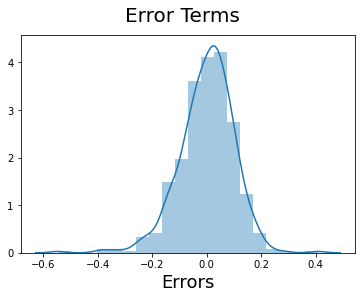

In [145]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

### Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

In [146]:
df_test.head()

,temp,hum,windspeed,cnt,spring,summer,winter,2019,aug,dec,...,not-holiday,Mon,Sat,Sun,Ths,Tue,Wed,Workingday,Light snow,Mist
184,0.831783,0.655956,0.121812,0.692706,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
535,0.901354,0.608826,0.188468,0.712034,0,1,0,1,0,0,...,1,0,0,0,0,0,1,1,0,0
299,0.511964,0.835904,0.361537,0.303382,0,0,1,0,0,0,...,1,0,0,0,1,0,0,1,0,1
221,0.881625,0.436161,0.366681,0.547400,0,0,0,0,1,0,...,1,0,0,0,0,0,1,1,0,0
152,0.817246,0.313625,0.556403,0.569029,0,1,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0


In [148]:
df_test.columns

Index(['temp', 'hum', 'windspeed', 'spring', 'summer', 'winter', '2019', 'aug',
       'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep',
       'not-holiday', 'Mon', 'Sat', 'Sun', 'Ths', 'Tue', 'Wed', 'Workingday',
       'Light snow', 'Mist'],
      dtype='object')

In [147]:
# Dividing to X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [151]:
X_test = X_test.drop(['Sun','not-holiday','oct','Wed','mar','jun','aug','Ths','Tue','may','feb','Mon','hum','temp'],axis=1)
X_test.head()

,windspeed,spring,summer,winter,2019,dec,jan,jul,nov,sep,Sat,Workingday,Light snow,Mist
184,0.121812,0,0,0,0,0,0,1,0,0,0,0,0,1
535,0.188468,0,1,0,1,0,0,0,0,0,0,1,0,0
299,0.361537,0,0,1,0,0,0,0,0,0,0,1,0,1
221,0.366681,0,0,0,0,0,0,0,0,0,0,1,0,0
152,0.556403,0,1,0,0,0,0,0,0,0,0,1,0,0


In [152]:
#Adding constant
X_test_m = sm.add_constant(X_test)

In [153]:
y_test_pred = lr_5.predict(X_test_m)

## Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

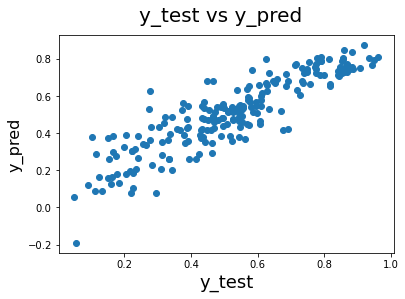

In [154]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

### R-squared value for y_test and y_pred

In [155]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [156]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_test_pred))

0.10153154242077148

In [158]:
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.782956549055384

#  Linear Regression using RFC 

In [159]:
df_test.shape

(219, 28)

In [160]:
df_train.shape

(510, 28)

In [161]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [165]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 27)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [166]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('2019', True, 1),
 ('aug', True, 1),
 ('dec', True, 1),
 ('feb', True, 1),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', True, 1),
 ('mar', False, 2),
 ('may', True, 1),
 ('nov', True, 1),
 ('oct', True, 1),
 ('sep', True, 1),
 ('not-holiday', True, 1),
 ('Mon', True, 1),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Ths', True, 1),
 ('Tue', True, 1),
 ('Wed', True, 1),
 ('Workingday', True, 1),
 ('Light snow', True, 1),
 ('Mist', True, 1)]

In [167]:
col = X_train.columns[rfe.support_]
col

Index(['temp', 'hum', 'windspeed', 'spring', 'summer', 'winter', '2019', 'aug',
       'dec', 'feb', 'jan', 'jul', 'jun', 'may', 'nov', 'oct', 'sep',
       'not-holiday', 'Mon', 'Sat', 'Sun', 'Ths', 'Tue', 'Wed', 'Workingday',
       'Light snow', 'Mist'],
      dtype='object')

In [178]:
X_train_rfe = X_train[col]
X_train_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temp         510 non-null    float64
 1   hum          510 non-null    float64
 2   windspeed    510 non-null    float64
 3   spring       510 non-null    int64  
 4   summer       510 non-null    int64  
 5   winter       510 non-null    int64  
 6   2019         510 non-null    int64  
 7   aug          510 non-null    int64  
 8   dec          510 non-null    int64  
 9   feb          510 non-null    int64  
 10  jan          510 non-null    int64  
 11  jul          510 non-null    int64  
 12  jun          510 non-null    int64  
 13  may          510 non-null    int64  
 14  nov          510 non-null    int64  
 15  oct          510 non-null    int64  
 16  sep          510 non-null    int64  
 17  not-holiday  510 non-null    int64  
 18  Mon          510 non-null    int64  
 19  Sat    

In [179]:
lm1 = LinearRegression()
lm1.fit(X_train_rfe,y_train)

LinearRegression()

In [171]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temp         219 non-null    float64
 1   hum          219 non-null    float64
 2   windspeed    219 non-null    float64
 3   spring       219 non-null    int64  
 4   summer       219 non-null    int64  
 5   winter       219 non-null    int64  
 6   2019         219 non-null    int64  
 7   aug          219 non-null    int64  
 8   dec          219 non-null    int64  
 9   feb          219 non-null    int64  
 10  jan          219 non-null    int64  
 11  jul          219 non-null    int64  
 12  jun          219 non-null    int64  
 13  mar          219 non-null    int64  
 14  may          219 non-null    int64  
 15  nov          219 non-null    int64  
 16  oct          219 non-null    int64  
 17  sep          219 non-null    int64  
 18  not-holiday  219 non-null    int64  
 19  Mon    

In [172]:
X_test_rfe = df_test[col]

In [180]:
y_testrfe_pred = lm1.predict(X_test_rfe)

In [181]:
r2_score_rfe = r2_score(y_test,y_testrfe_pred)
r2_score_rfe

0.8274933130511692

From stats model and RFE model the __R2_score differs by below 5%. so from above we can conclude that both models are signigicent__. 